In [1]:
import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.4.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split_nodes()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [6]:
%%time
from graphgallery.nn.models import Node2vec
model = Node2vec(graph)
model.build()
model.train(idx_train)
accuracy = model.test(idx_test)
print(f'Test accuracy {accuracy:.2%}')

Test accuracy 72.00%
CPU times: user 21.1 s, sys: 223 ms, total: 21.3 s
Wall time: 16 s


In [7]:
embeddings = model.embeddings

In [8]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(embeddings)

/home/jtli/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jtli/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


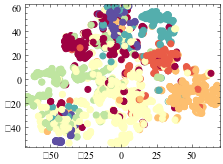

In [9]:
with plt.style.context(['science', 'no-latex']):
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=graph.labels, cmap=plt.cm.Spectral)
    plt.autoscale(tight=True)
    plt.show()    